In [1]:
import math
from random import random
from matplotlib import pyplot
import gudhi as gd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_circle(n, radius, max_noise):
    """
    Generate n points on a sphere with the center in the point (0,0) 
    with the given radius. 
    
    Noise is added so that the distance from
    the generated point to some point on the sphere does not
    exceed max_noise parameter.
    
    Returns the list of generated points.    
    """
    points = []
    for i in range(n):
        angle = 2 * math.pi * random()
        noise = max_noise * random()
        r = radius * (1 + noise)
        point = [r * math.cos(angle), r * math.sin(angle),r]
        points.append(point)
    return np.array(points)

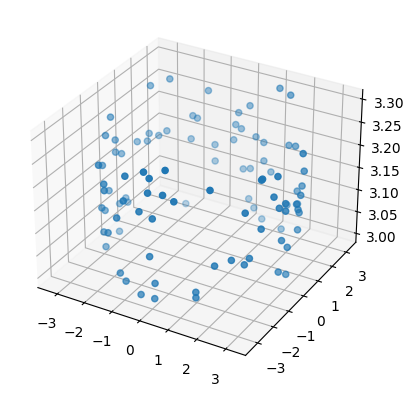

In [3]:
circle = generate_circle(100, 3, 0.1)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=circle[:,0], ys=circle[:,1], zs=circle[:,2])

In [4]:
def rips_graph(points):
    """
    Generate the Vietoris-Rips complex on the given set of points in 2D.
    Only simplexes up to dimension skeleton are computed.
    The max parameter denotes the distance cut-off value.
    """
    rc = gd.RipsComplex(points=points,max_edge_length=.2)
    st = rc.create_simplex_tree(max_dimension=2)
    triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0])==3])
    fig = go.Figure(data=[
    go.Mesh3d(
        # Use the first 3 coordinates, but we could as easily pick others
        x=points[:,0],
        y=points[:,1],
        z=points[:,2],
        i = triangles[:,0],
        j = triangles[:,1],
        k = triangles[:,2],
    )])
    fig.show()

In [5]:
rips_complex = rips_graph(points=circle)